# Lab | Customer Analysis Final Round

## 01 - Problem (case study)

* **Data Description**

The data is provided by Ironhack in a csv table with the following features:

Number of rows: 9134

Number of columns: 24

Number of numerical variables: 8


Number of categorical/non-numerical variables: 16


* **Goal**

The objective of this data is to understand customer demographics and buying behavior. We will use predictive analytics to analyze the most profitable customers and how they interact by using the total claim amount as the dependant variable. After this analysis , we will take targeted actions to increase profitable customer response, retention, and growth.

## 02 - Getting Data

In [131]:
#Importing libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [132]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [133]:
# Open the data and getting the data frame 
df=pd.read_csv('marketing_customer_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [134]:
#Show the dataframe shape.
df.shape

(9134, 24)

In [135]:
#Checking categorical and numerical variables
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include=np.object)
df_num
df_cat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## 03 - Cleaning/Wrangling/EDA

* Change headers names

In [136]:
#Changing headers name. We have different ways to transform all the headers into lower case
# df.columns = map(str.lower, df.columns)
# df.head()
#Standardize header names
df.columns= df.columns.str.lower()
df.head()
#Other way to do it: 
# cols= [x.lower() for x in df.columns]
# df.columns= cols
# df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


* Deal with NaN values

In [137]:
#Checking NaN values
df.isna().sum()
# Checking NaN values now showing the percentage of null values in a column
round(df.isna().sum()/len(df),4)*100 
# There are 0 NaN values.Let´s check it getting the total amount of Nan
df.isnull().sum().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

customer                         0.0
state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
total claim amount               0.0
vehicle class                    0.0
vehicle size                     0.0
dtype: float64

0

In [138]:
#Effective to date is objet data time.We will convert effective to date into a datatime format
df['effective to date']
#Transforming a column into a date time type
df['effective to date'] = pd.to_datetime(df['effective to date'])
df['effective to date']
df.head()

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective to date, Length: 9134, dtype: object

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective to date, Length: 9134, dtype: datetime64[ns]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


 * Checking categorical and numerical features

In [139]:
#Checking data types
df.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [140]:
#Categorical Features
df_cat=df.select_dtypes(include=np.object)
df_cat
#We previously transform 'effective to date'into a datatime format. So now we have 15 categorical features.

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [141]:
# Numerical Features
df_num=df.select_dtypes(include=np.number)
df_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


* Exploration.

For the numerical variables, we will check the multicollinearity between the features.

We use the total_claim_amount as the target variable.

In [142]:
# Exploration numerical features
df.describe(include=[np.number])

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


The variable 'customer life time value ' has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'customer lifetime value ' value proves this point.There is a huge difference between the max value and the percentil 75%.

In [143]:
#It seems that we will have to deal with outliers here.
df['customer lifetime value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer lifetime value, dtype: float64

In [144]:
#Exploration categorical features
df.describe(include=[np.object])

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,MG10140,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


Unique is the number of unique categories in that column. Top the most frequented category.Freq is the number of times the top object apperars in the column 

In [145]:
#Explorating correlation.
#We will first use the correlation matrix in order to check the multicollinearity between the features
corr_matrix=df_num.corr()
corr_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

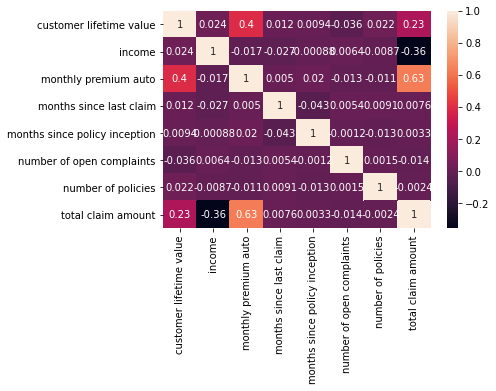

In [146]:
#Now to easily visualize this correlation relationships between them we will use the seaborn heatmap
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Our label is total claim amount ( total amount claimed by the customer). This is the variable we want to predict so we need to see the correlation of each feature with this variable. 

The most highest correlation in our numerical data is shown between the variables Total Claim Amount  and Monthly Premium Auto. It is a positive correlation so a high  monthly premium auto might suposse a higher total claim amount. 

Other variables that show some kind of correlation are Customer Lifetime Value  with positive correlation of 23% and Income with a negative correlation of -36%.tive correlation.


## 04 - Processing Data
Dealing with outliers.

Normalization.

Encoding Categorical Data.

Splitting into train set and test set.

* Dealing with outliers

In [147]:
#We detected important outliers in the values of customer lifetime value 
#Let´s check the shape of the distribution

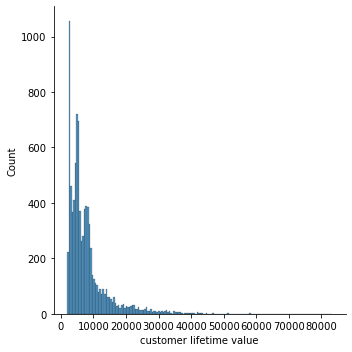

In [148]:
sns.displot(df['customer lifetime value'])
plt.show()

The distribution do not look like a normal distribution

<AxesSubplot:>

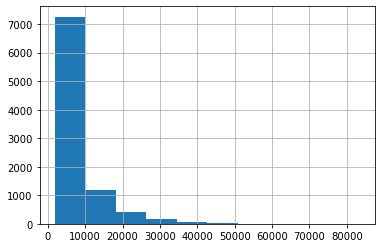

In [149]:
df['customer lifetime value'].hist()
plt.show()

<AxesSubplot:xlabel='customer lifetime value'>

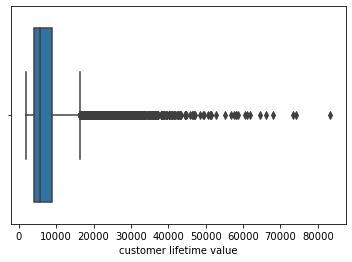

In [150]:
sns.boxplot(x=df['customer lifetime value'])
plt.show()

We detect important outliers in this features, so we will need to remove them.

In [151]:
df.shape

(9134, 24)

8317

6279.177891973307

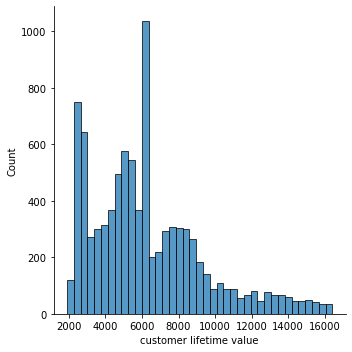

<AxesSubplot:xlabel='customer lifetime value'>

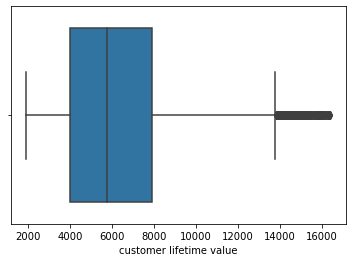

In [152]:
iqr = np.percentile(df['customer lifetime value'],75) - np.percentile(df['customer lifetime value'],25)
upper_limit = np.percentile(df['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(df['customer lifetime value'],25) - 1.5*iqr
# We locate the outliers
lenghtValues=len(df[(df['customer lifetime value']>lower_limit) & (df['customer lifetime value']<upper_limit)])  # number of such observations.
lenghtValues
dataCLV = df.loc[(df['customer lifetime value'] > lower_limit) & (df['customer lifetime value'] < upper_limit)]
# dataCLV.head(10)
# # Now we calculate mean of the column, excluding the outliers
mean = np.sum(dataCLV['customer lifetime value'])/lenghtValues
mean
# # Finally, we replace the outliers with the mean of the values that actually within the confidence interval
def replace_outliers_with_mean(x):
    if x < lower_limit:
        return mean
    elif x > upper_limit:
        return mean
    else:
        return x
df['customer lifetime value'] = list(map(replace_outliers_with_mean,df['customer lifetime value']))
# # The result is a less skweed distribution
sns.displot(df['customer lifetime value'])
plt.show()
sns.boxplot(x=df['customer lifetime value'])
plt.show()

In [153]:
df.shape
#Ceck that the rows remains the same as the original data

(9134, 24)

In [154]:
df.head(10)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,6279.177892,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


 * Normalization.

In [155]:
#y,X split.separate the features from the labels
y = df['total claim amount']
X = df.drop(['total claim amount'], axis=1)

In [156]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
X_num.head()
X_cat.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [157]:
#Standarize num values in a similar scale
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

(9134, 7)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.059651,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.350217,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.757387,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.396140,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.063109,0.438443,0.050633,0.342857,0.444444,0.0,0.000


* Encoding Categorical Data.

We have 15 categorical variables but we are going to select only on for our analysis.

**Coverage is the one we select**

In our previous analysis we found out that the variable that has a higher correlaton wiht our label is monthly premium auto so we only take in to consideraton the type of coverage which the clients have(coverage).


In [158]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
X_num.head()
X_cat.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [159]:
X_cat_reduced= X_cat[['coverage']] # Note:one braquet for creting an array. Doble braquet for creating a df.
X_cat.head()
X_cat_reduced.head()

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,coverage
0,Basic
1,Extended
2,Premium
3,Basic
4,Basic


In [160]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat_reduced)
print(encoder.categories_)
encoded = encoder.transform(X_cat_reduced).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded.head()

[array(['Basic', 'Extended', 'Premium'], dtype=object)]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


,Basic,Extended,Premium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [161]:
#because one of the variables can be deduced from the others, there is no point in keeping all these columns around.
#We drop one of them
onehot_encoded = onehot_encoded.drop(['Basic'],axis=1)
onehot_encoded.head()

,Extended,Premium
0,0.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [162]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,"(Extended,)","(Premium,)"
0,0.059651,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0
1,0.350217,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1.0,0.0
2,0.757387,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0
3,0.396140,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0
4,0.063109,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0


In [163]:
X.rename(columns={('Extended',): 'Extended Coverage', ('Premium',):'Premium Coverage'}, inplace=True)
X.head(2)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,Extended Coverage,Premium Coverage
0,0.059651,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0
1,0.350217,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1.0,0.0


## 05 - Modeling
Apply model.

We apply linear regression model to our data

In [164]:
y = df[['total claim amount']]
y.head()

,total claim amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6850, 9)
(2284, 9)
(6850, 1)
(2284, 1)


In [167]:
X_train.head()
X_test.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,Extended Coverage,Premium Coverage
5114,0.301949,0.814155,0.181435,0.171429,0.191919,0.0,0.125,0.0,1.0
2438,0.044293,0.425651,0.016878,0.114286,0.353535,0.0,0.000,0.0,0.0
312,0.274381,0.858733,0.050633,0.085714,0.191919,0.0,0.625,0.0,0.0
4039,0.526431,0.624329,0.080169,0.628571,0.505051,0.4,0.125,1.0,0.0
5801,0.044545,0.410668,0.012658,0.171429,0.121212,0.0,0.000,0.0,0.0


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,Extended Coverage,Premium Coverage
768,0.037450,0.000000,0.016878,0.200000,0.282828,0.0,0.000,0.0,0.0
1477,0.181432,0.346466,0.236287,0.657143,0.545455,0.4,0.000,0.0,0.0
3902,0.455069,0.791680,0.189873,0.342857,0.050505,0.0,0.750,0.0,0.0
2713,0.301949,0.000000,0.472574,0.685714,0.212121,0.0,0.125,0.0,1.0
165,0.404775,0.218802,0.029536,0.342857,0.282828,0.0,0.125,0.0,0.0


In [168]:
y_test.head()8

,total claim amount
768,312.000000
1477,466.318191
3902,508.800000
2713,1245.600000
165,465.414770


In [169]:
#we train/fit our model with our training set.
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [170]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
predictions

array([[421.37707667],
       [571.8118919 ],
       [377.62197377],
       ...,
       [531.8300144 ],
       [541.15291939],
       [360.46214301]])

## 06 - Model Validation

In [171]:
#we use several indicators to validate our model.
from sklearn.metrics import mean_squared_error, r2_score

In [172]:
mse = mean_squared_error(y_test, predictions)
print(mse)

41021.46299212472


In [173]:
#we calculate the rmse to have a comparable measure with our data
rmse = math.sqrt(mse)
print(rmse)

202.5375594602757


In [174]:
r2 = r2_score(y_test, predictions)
r2

0.5157050811013859

## 06 - Reporting

We used predictive analytics to analyze the behaviour of the clients of an insurance company and how they interact by using the total claim amount as the dependant variable.The less total claimt amount that a client has, the more profitable is this client.

This variable  give us information about how profitable a client is,how can we increase the profitability of each client and increase our retention rate.

Our model predict the total claim amount with a  r-squared  of 0,51 which shows how well the data fit the regression model. In our case this score is not high enough to state that our model predict with enough accuracy the total claim amount so we recomend to revise it and try to gather other data that could help us to improve our model. 
